In [1]:
import sys, os
import numpy as np

import matplotlib.pyplot as plt

#define directories
rpaper = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall' #ricepaper should be in this directory
datadir = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall\ricepaper\test_notebooks\test_data' #directory to load data from
os.chdir(rpaper)

In [2]:
#import ricepaper classes
from ricepaper.reader import RiceBall

RiceBall Reader
------

RiceBall reader can be used to load any *.OUT* file created by RiceBall. Here we load a sandpile model and define particle radii for visualisation (as these are not stored in the ouput).

In [3]:
os.chdir(datadir)
pile = RiceBall('settled_layers_w_friction.OUT',radii={1:30,2:25,3:20},density={1:2500,2:2500,3:2500})

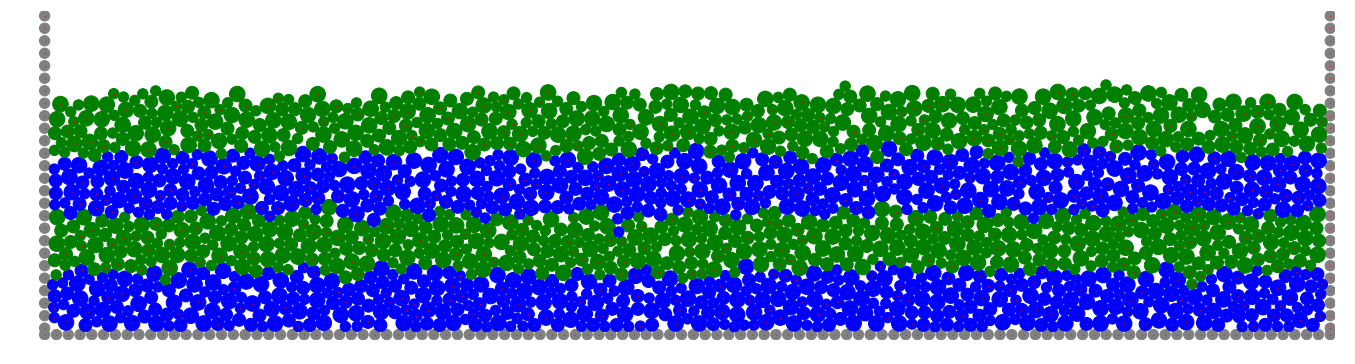

Model contains 2022 nodes and 3695 interactions



In [4]:
pile.quickPlot()
print("Model contains %d nodes and %d interactions\n" % (pile.nBalls(),pile.nInteractions()))

Preliminary Analyses
========

After loading the output we can start to explore the energy of particles in the sytem (is everything at rest?) and the forces they are subject to.

In [5]:
#get all basic attributes (mainly to test they all work!)
pid,pos,vel,spe,mass,dens,rad,vol,kin = pile.getAttributes(["pos","vel","spe",
                                        "mass","dens","rad","vol","kin"])

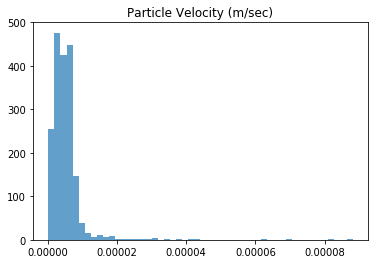

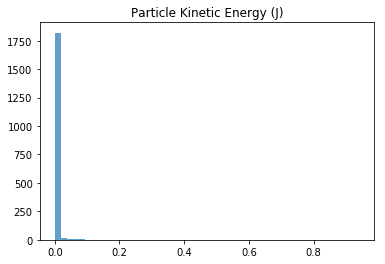

In [6]:
#do some plots
plt.hist(spe,bins=50,alpha=0.7)
plt.title("Particle Velocity (m/sec)")
plt.show()

plt.hist(np.array(kin),bins=50,alpha=0.7)
plt.title("Particle Kinetic Energy (J)")
plt.show()

In [7]:
print("Median Velocity (m/sec): ", np.median(spe))
print("Median kinetic energy (J)", np.median(np.array(kin)))

Median Velocity (m/sec):  4.482995059263518e-06
Median kinetic energy (J) 0.0015024225929650688


The histograms and the median velocity/kinetic energy values suggest that the sytem is largely in equillibrium. The plot at the end of the previous notebook also suggests this.

Per-particle forces
----------------------------

Given the equillibrium state, we can start investigating per-particle forces to explore the state of stress within the pile. Dynamic properties of particles can be retrieved using the getAttributes(...) function.

In [8]:
pid, force, torque, acc = pile.getAttributes(["force","torque","acc"])

First we find and plot unbalanced particles; which we define as particles undergoing accelerations of > 0.1 m/sec. There are not many of these, suggesting the system is largely static. 

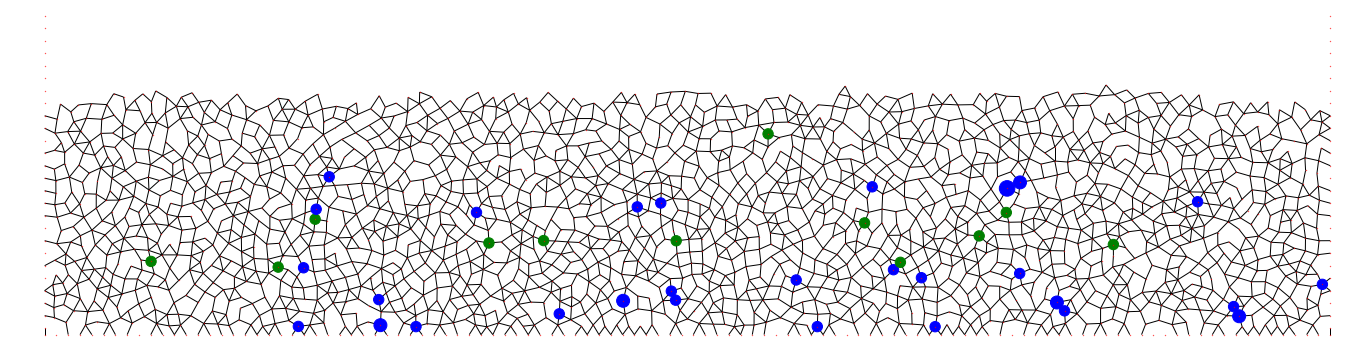

In [9]:
#show unbalanced particles
pile.plotUnbalanced( 0.1 )

We will also create a histogram of resultant force magnitudes and net torque, a similar way to look at the overall stability of the system (the resultant forces/torques on all particles in a perfectly stable assemblage should be zero). 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


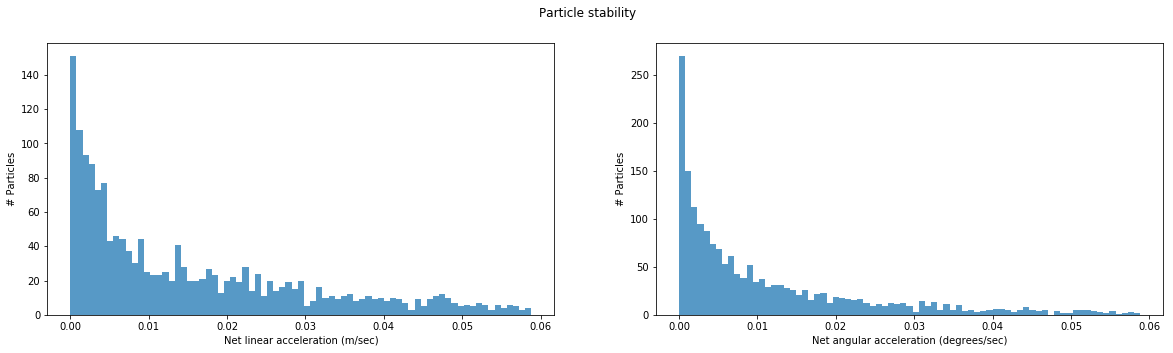

In [10]:
pile.plotNetAcc()

As we have convinced ourselves that the assemblage is (largely) at rest, we can derive quasi-continuum properties such as per-particle stresses:

In [11]:
pid,stress = pile.getAttributes(["sig1"])

The RiceBall class also contains a variety of functionality for sculpting a model for incorporation into a future model. Here, we specify the slope of the pile by deleting particles to generate the inital state for a slope stability model.

In [12]:
#shape volcano using cutting lines
#deleted = pile.cut(5000,30)
#deleted += pile.cut(10000,-30)

In [13]:
#pile.quickPlot()
#print("Model contains %d nodes and %d interactions\n" % (pile.nBalls(),pile.nInteractions()))